In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [52]:
df = pd.read_csv(r"C:\Users\mainakd\Documents\AKshayTask\nlp\machine_learning_self_study_udemy\model\datasets\Mall_Customers.csv", index_col=0)

df.head(10)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [53]:
df.drop('Gender', axis=1, inplace=True)
df.drop('Age', axis=1, inplace=True)
df.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [54]:
# frac =1 insure that all of the original data are preserved
df = df.sample(frac=1)

In [55]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
kmeans.labels_
# labels_ show that which data point belongs to which cluster

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1])

In [57]:
# Cross check
np.unique(kmeans.labels_) 
# there is only 2 cluster

array([0, 1])

In [58]:
# kmeans algo will cluster your data points and represent each cluster using cluster centers
centers = kmeans.cluster_centers_
centers

array([[62.75      , 76.67105263],
       [59.21774194, 33.97580645]])

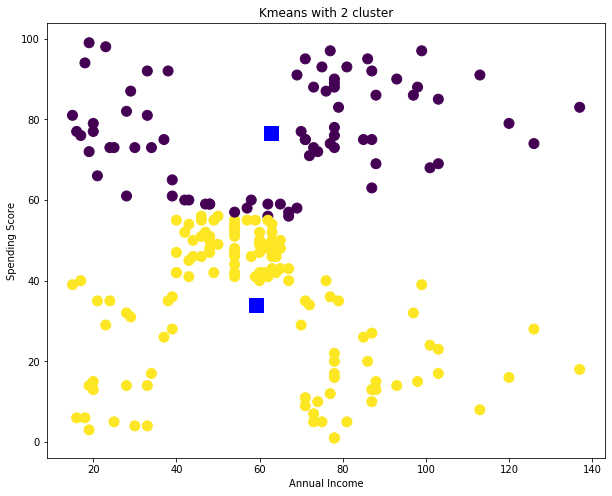

In [64]:
plt.figure(figsize=(10,8))

plt.scatter(df['Annual Income (k$)'],
           df['Spending Score (1-100)'],
           c = kmeans.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color = 'blue', marker = 's', s=200)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Kmeans with 2 cluster')

plt.show()

In [65]:
# Evaluate a clustering model
# use silhouette-score : A measure of how similar a point is to other points in its own cluster and how different it is from
                        # points in other clusters
    
from sklearn.metrics import silhouette_score
score = silhouette_score(df, kmeans.labels_)
print("Scroe: {}".format(score))

Scroe: 0.31827029153316977


In [66]:
# Silhouette score can be changed based on number of cluster u specify in your cluster algo

kmeans = KMeans(n_clusters =5)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
np.unique(kmeans.labels_) 

array([0, 1, 2, 3, 4])

In [68]:
centers = kmeans.cluster_centers_
centers

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

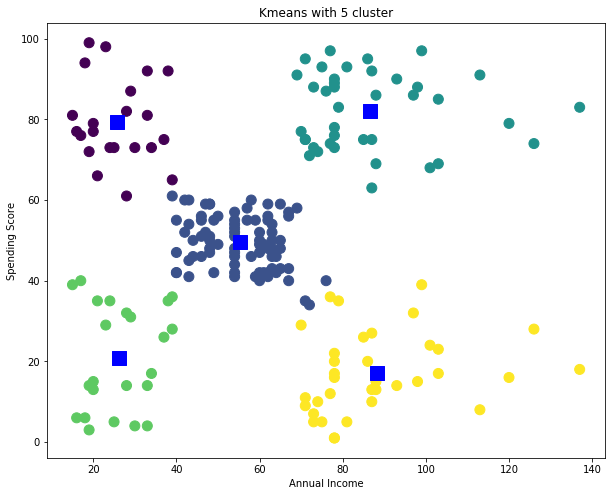

In [71]:
plt.figure(figsize=(10,8))

plt.scatter(df['Annual Income (k$)'],
           df['Spending Score (1-100)'],
           c = kmeans.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color = 'blue', marker = 's', s=200)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Kmeans with 5 cluster')

plt.show()

In [70]:
score = silhouette_score(df, kmeans.labels_)
print("Scroe: {}".format(score))

Scroe: 0.553931997444648
